# Natural Language Processing Project

Finally, found a dataset to practice on!

We will use the [Fake and Real News dataset from Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download).

Each observation in the dataset is a news article and the label is whether the article is real or fake.

So, Download it from `Kaggle` and unzip it. now let's start coding.

In [1]:
import numpy as np
import pandas as pd

If you take look at the unzipped folder, you will find two files `Fake.csv` and `True.csv`. We will combine these two files into one `dataframe` and then we will split it into train and test sets.

So, Let's load the data.

In [2]:
fake = pd.read_csv('./Fake_News/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 66.5 MB


That's a lot of data!

Let's load the real news data.

In [4]:
real = pd.read_csv('./Fake_News/True.csv')

In [5]:
real.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 82.6 MB


That's a lot of data! Again!

Now, the issue is the memory usage. We need to reduce the memory usage. Will talk about that later...(maybe not)🙄

So, we have to combine the two dataframes into one and as the data is not labeled, we have to create a label column before combining the dataframes.

In [6]:
fake['label'] = 'fake'
real['label'] = 'real'

In [7]:
fake.head(1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake


In [8]:
real.head(1)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real


So, now let's combine the two dataframes into one.

In [9]:
data = pd.concat([fake, real], axis=0)
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 152.1 MB


Well, the data is combined but one thing we should do is shuffle the data. Because concatenating two dataframes doesn't shuffle the data.

In [10]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
data.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",real


> Here, I'm using the `sample()` method to shuffle the data. The frac argument is the fraction of the data to shuffle. The random_state argument is the random seed. The reset_index() method is used to reset the index of the dataframe.

Now, let's do some exploratory data analysis.

## EDA

I'll try to see if there are any connections between the title length and the label.

So, we have to make a new column with the length of the title.

In [12]:
data['title_len'] = data['title'].str.len()
data['text_len'] = data['text'].str.len()
data.head()

,title,text,subject,date,label,title_len,text_len
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",fake,89,1028
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",real,55,4820
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",real,64,1848
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",fake,89,1244
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",real,55,3137


> I also added a new column with the length of the text.

I think we should also add the word count of the title and the text.

In [14]:
data['title_word_count'] = data['title'].str.split().str.len()
data['text_word_count'] = data['text'].str.split().str.len()
data.head()

,title,text,subject,date,label,title_len,text_len,title_word_count,text_word_count
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",fake,89,1028,14,171
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",real,55,4820,8,771
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",real,64,1848,10,304
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",fake,89,1244,12,183
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",real,55,3137,10,529


Now let's seee if there's any correlation between the length of the title and the label.

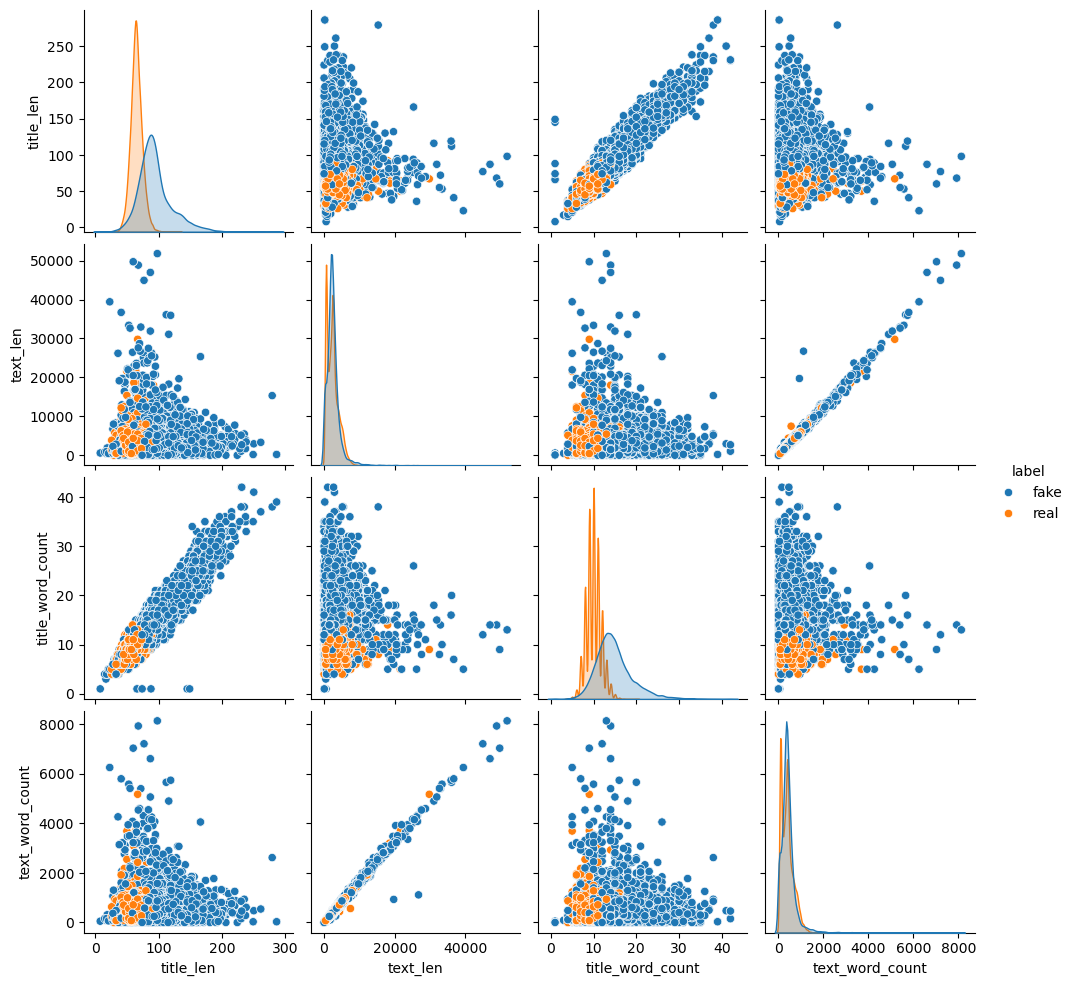

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=data[['title_len', 'text_len', 'title_word_count', 'text_word_count', 'label']], hue='label')

Ow wow! There's a very clear correlation the length of the title, text length and the word count of the title and the text. Also we can see we define cluster of fake news and real news.

That's great.

There's one column that doesn't have that much correlation with the label. That's the text_len column.

So, Let's see a histogram of the text_len column.

<Axes: xlabel='text_len', ylabel='Count'>

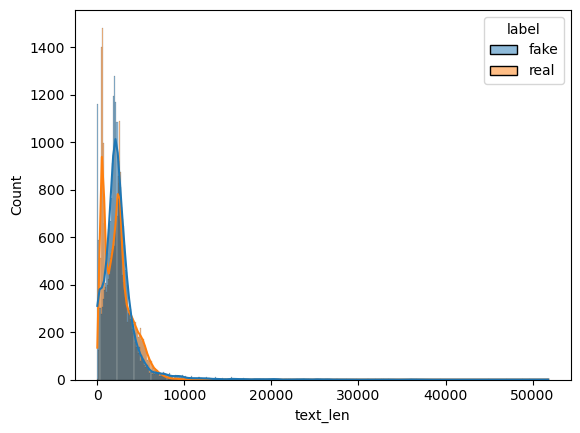

In [20]:
sns.histplot(
    data=data,
    x='text_len',
    hue='label',
    kde=True
)

there is a difference but not much. We have to keep that in mind for later.

Now there's another column named `subject` that we cannot overlook.

First let's check if it is a categorical column.

In [23]:
data['subject'].nunique()

8

Yes, it is a categorical column. It has 8 classes.

Let's see the distribution of real and fake news in each class.

<Axes: xlabel='subject', ylabel='count'>

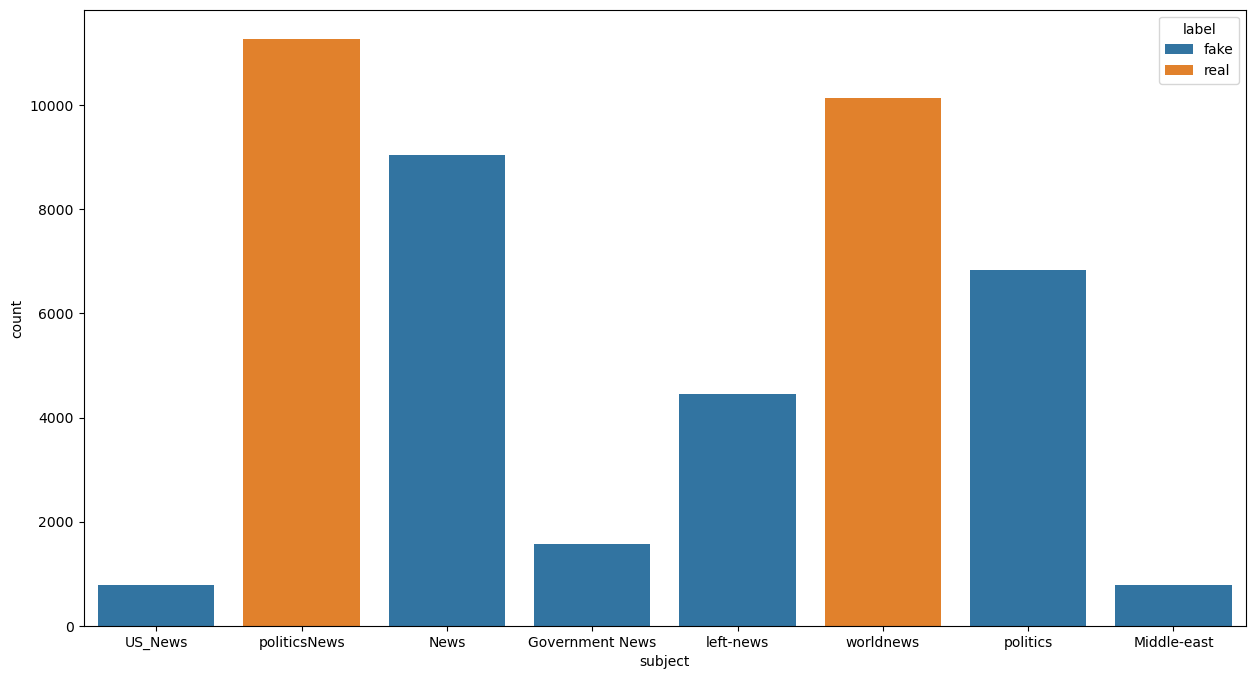

In [28]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='subject', hue='label')

Well this is not good. Only real news in the dataset is in the `politicsNews` and `worldNews` class all the other classes have fake news. This can heavily effect our model.

So, we should drop the `subject` column.

In [31]:
data.drop(
    columns=['subject', 'date'],
    inplace=True
)

> I also dropped the `date` column because it has no correlation with the label.

Alright, So time to make a model and test it out.

First we have to split the data into train and test.

In [33]:
features = data.drop(columns='label')
target = data['label']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

Now, we have to think of how should we scale the data.

First we have columns like `title_len` and `text_len` that are not scaled. Also `title_word_count` and `text_word_count` are not scaled.

As we saw earlier there a very small correlation between the length of the title and title_word_count with the label.

So I'll not use the `title_len` and `title_word_count` columns.

So, now we have to make a tokenizer function.

In [37]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to /home/itvaya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/itvaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/itvaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/itvaya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Here I'm downloading some nltk packages to make things easier.

> `punkt` is a tokenizer that splits the text into words.
> `stopwords` is a list of words that we want to remove from the text.

> `wordnet` is a dictionary of words that we want to lemmatize.

> `omw-1.4` is a list of words that we want to lemmatize.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def nlp_analyzer(text):
    # 1. lowercase
    text = text.lower()

    # 2. remove urls
    text = re.sub(r"http\S+|www\S+", "", text)

    # 3. remove punctuation & numbers
    text = re.sub(r"[^a-z\s]", "", text)

    # 4. tokenize
    tokens = word_tokenize(text)

    # 5. remove stopwords + short words
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    # 6. lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens
